# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 21.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
89214,0.6445,0.2661,0.2344,0.0024,0.0049,0.0098,0.1074,0.9131,0.0830,0.6274,6,6,11,11
27568,0.1904,1.0840,0.8008,0.0415,0.0586,0.1343,1.1597,1.1865,0.1050,0.3491,3,3,4,4
221935,0.0171,0.0024,0.0024,0.0024,0.0024,0.0024,0.3027,0.1074,0.0024,0.1611,0,0,0,0
66513,0.2271,0.0562,1.2329,0.1294,0.0049,0.0073,0.2124,1.3965,0.1538,0.5103,9,9,8,8
384894,0.0122,0.0024,0.0024,0.0024,0.0024,0.0024,0.0049,0.1050,0.0024,0.1440,0,0,0,0


In [3]:
raw_data.shape

(474360, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474360 entries, 0 to 474359
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          474360 non-null  float64
 1   Emg2          474360 non-null  float64
 2   Emg3          474360 non-null  float64
 3   Emg4          474360 non-null  float64
 4   Emg5          474360 non-null  float64
 5   Emg6          474360 non-null  float64
 6   Emg7          474360 non-null  float64
 7   Emg8          474360 non-null  float64
 8   Emg9          474360 non-null  float64
 9   Emg10         474360 non-null  float64
 10  repetition    474360 non-null  int64  
 11  rerepetition  474360 non-null  int64  
 12  stimulus      474360 non-null  int64  
 13  restimulus    474360 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.7 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000,474360.000000
mean,0.160505,0.142269,0.172002,0.046039,0.011075,0.027917,0.315248,0.309821,0.053934,0.377027,3.131552,2.228957,5.549161,4.007633
std,0.339476,0.326525,0.424151,0.168354,0.032590,0.077402,0.423296,0.421916,0.161553,0.583646,3.480692,3.258935,6.568903,6.186889
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.090300,0.029300,0.002400,0.036600,0.000000,0.000000,0.000000,0.000000
50%,0.029300,0.002400,0.002400,0.002400,0.002400,0.002400,0.192900,0.117200,0.002400,0.158700,2.000000,0.000000,3.000000,0.000000
75%,0.153800,0.114700,0.185500,0.002400,0.002400,0.017100,0.368700,0.481000,0.029300,0.498000,6.000000,4.000000,10.000000,7.000000
max,4.660600,4.316400,4.655800,4.038100,0.712900,2.050800,4.658200,4.660600,3.933100,4.658200,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     204306
7      15626
8      15623
12     15606
2      15606
4      15601
6      15584
5      15581
9      15580
11     15571
10     15558
1      15549
3      15534
17     10420
14     10406
13     10403
15     10366
16     10340
19      5202
21      5202
18      5201
20      5169
22      5164
23      5162
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

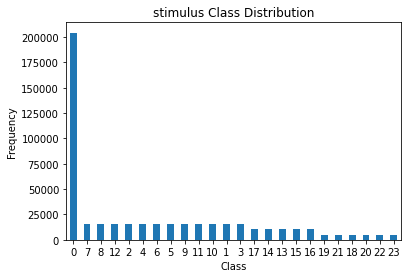

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
172632,0.2539,0.2124,0.3394,0.0293,0.0439,0.0342,0.2856,0.7495,0.0171,0.2588,4,4,9,9
18544,0.0537,0.0928,0.2393,0.0024,0.0024,0.0024,0.2905,0.5371,0.0024,0.2295,2,2,3,3
304018,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.2173,0.0195,0.0024,0.0269,0,0,0,0
225888,0.1196,0.0244,0.0024,0.0220,0.0024,0.0513,0.4932,0.2563,0.0073,0.2026,7,7,15,15
337127,1.3770,0.6348,0.8252,0.0269,0.0708,0.1929,1.0474,1.1304,0.3345,1.2622,9,9,10,10


In [12]:
raw_data.shape

(395367, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395367 entries, 0 to 474359
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          395367 non-null  float64
 1   Emg2          395367 non-null  float64
 2   Emg3          395367 non-null  float64
 3   Emg4          395367 non-null  float64
 4   Emg5          395367 non-null  float64
 5   Emg6          395367 non-null  float64
 6   Emg7          395367 non-null  float64
 7   Emg8          395367 non-null  float64
 8   Emg9          395367 non-null  float64
 9   Emg10         395367 non-null  float64
 10  repetition    395367 non-null  int64  
 11  rerepetition  395367 non-null  int64  
 12  stimulus      395367 non-null  int64  
 13  restimulus    395367 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 45.2 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 85.84490477274451


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     40693
           1       0.73      0.74      0.73      2211
           2       0.75      0.75      0.75      2205
           3       0.78      0.78      0.78      2240
           4       0.80      0.79      0.79      2299
           5       0.74      0.76      0.75      2190
           6       0.78      0.79      0.78      2298
           7       0.75      0.77      0.76      2181
           8       0.72      0.74      0.73      2126
           9       0.72      0.72      0.72      2138
          10       0.70      0.70      0.70      1939
          11       0.72      0.74      0.73      2149
          12       0.75      0.74      0.74      2203
          13       0.72      0.72      0.72      1470
          14       0.70      0.68      0.69      1353
          15       0.71      0.73      0.72      1363
          16       0.77      0.78      0.78      1631
 

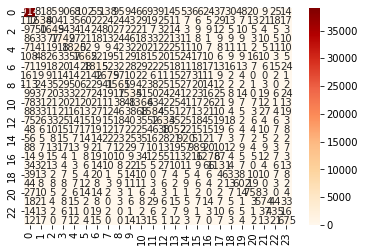

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.9606571060019728
MSE: 10.38041581303589
RMSE: 3.221865269224629


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8588602234703594
Recall Score :  0.8584490477274451
f1_score :  0.8586158769243067


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 90.18387839239193


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     40693
           1       0.81      0.82      0.82      2211
           2       0.83      0.83      0.83      2205
           3       0.88      0.84      0.86      2240
           4       0.86      0.85      0.85      2299
           5       0.83      0.83      0.83      2190
           6       0.89      0.84      0.86      2298
           7       0.84      0.81      0.83      2181
           8       0.81      0.79      0.80      2126
           9       0.85      0.79      0.82      2138
          10       0.80      0.78      0.79      1939
          11       0.85      0.81      0.83      2149
          12       0.83      0.81      0.82      2203
          13       0.84      0.79      0.81      1470
          14       0.80      0.71      0.75      1353
          15       0.77      0.76      0.77      1363
          16       0.91      0.85      0.88      1631
 

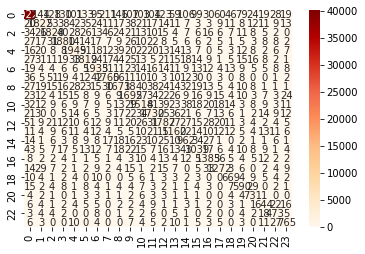

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.6787060222070466
MSE: 7.417001795786225
RMSE: 2.7234173010734555


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.9000011080028927
Recall Score :  0.9018387839239194
f1_score :  0.9003742763298525


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 93.98032222981006


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     40693
           1       0.90      0.88      0.89      2211
           2       0.92      0.89      0.91      2205
           3       0.95      0.89      0.92      2240
           4       0.93      0.91      0.92      2299
           5       0.92      0.89      0.90      2190
           6       0.94      0.90      0.92      2298
           7       0.91      0.87      0.89      2181
           8       0.89      0.87      0.88      2126
           9       0.92      0.86      0.89      2138
          10       0.91      0.85      0.88      1939
          11       0.91      0.86      0.88      2149
          12       0.88      0.90      0.89      2203
          13       0.92      0.87      0.90      1470
          14       0.87      0.82      0.85      1353
          15       0.84      0.89      0.86      1363
          16       0.93      0.93      0.93      1631
 

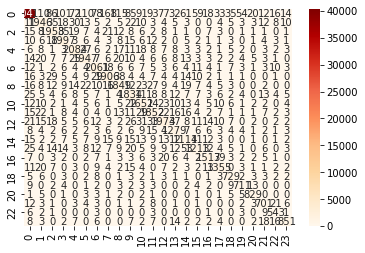

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.41573715759921087
MSE: 4.610112046943369
RMSE: 2.1471171479319358


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9392436491559414
Recall Score :  0.9398032222981005
f1_score :  0.9391720499442393


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[12:25:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 88.95085616005261


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     40693
           1       0.79      0.79      0.79      2211
           2       0.82      0.79      0.80      2205
           3       0.88      0.79      0.84      2240
           4       0.85      0.84      0.84      2299
           5       0.83      0.79      0.81      2190
           6       0.87      0.82      0.84      2298
           7       0.83      0.79      0.81      2181
           8       0.79      0.77      0.78      2126
           9       0.79      0.73      0.76      2138
          10       0.77      0.71      0.74      1939
          11       0.80      0.77      0.78      2149
          12       0.74      0.77      0.75      2203
          13       0.81      0.75      0.78      1470
          14       0.74      0.69      0.71      1353
          15       0.72      0.82      0.76      1363
          16       0.84      0.83      0.84      1631
 

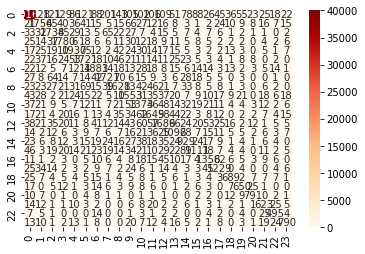

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.7196044211751018
MSE: 7.666843716012849
RMSE: 2.76890659214298


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.8875984863061599
Recall Score :  0.889508561600526
f1_score :  0.888048789353067


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 94.65816829804993


Classification report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     40693
           1       0.92      0.89      0.90      2211
           2       0.94      0.90      0.92      2205
           3       0.96      0.90      0.93      2240
           4       0.95      0.91      0.93      2299
           5       0.93      0.90      0.91      2190
           6       0.96      0.91      0.93      2298
           7       0.92      0.89      0.90      2181
           8       0.91      0.88      0.90      2126
           9       0.93      0.87      0.90      2138
          10       0.91      0.87      0.89      1939
          11       0.93      0.88      0.90      2149
          12       0.90      0.91      0.90      2203
          13       0.94      0.90      0.92      1470
          14       0.89      0.84      0.86      1353
          15       0.86      0.90      0.88      1363
          16       0.95      0.95      0.95      1631
 

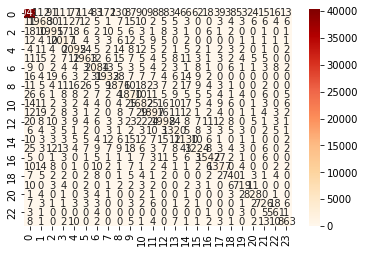

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.3802008245440979
MSE: 4.258846144118168
RMSE: 2.063697202624011


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.946216419865981
Recall Score :  0.9465816829804993
f1_score :  0.9460300490173019
